# Crime Analysis of LA

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Crime_Data_2010_2017.csv")

In [4]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [6]:
df.columns.unique()

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [8]:
#Count of victim sex
df['Victim Sex'].value_counts()

M    739581
F    675402
X     24080
H        53
-         1
Name: Victim Sex, dtype: int64

## Research Question
##### Which city had the most crimes between 2010 and 2017?  What were the most common crimes and how was it affected by gender?

In [25]:
#Area with most crimes
df['Area Name'].value_counts().head(1)

77th Street    110605
Name: Area Name, dtype: int64

In [34]:
#Create df to analyze worst area
df_77st = df[df['Area Name']=='77th Street']

In [38]:
#Find most common weapons used in worst area
df_77st['Weapon Description'].value_counts().head(3)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    29181
VERBAL THREAT                                      3756
HAND GUN                                           3617
Name: Weapon Description, dtype: int64

In [56]:
#Victim sex distribution in worst area
df_77st['Victim Sex'].value_counts()

F    55281
M    43082
X      613
H        1
Name: Victim Sex, dtype: int64

In [63]:
#Table of weapons used on people by sex in worst area
df_77st_weapon = pd.crosstab(df_77st['Victim Sex'],df_77st['Weapon Description'])

In [64]:
#Top 3 weapons used, grouped by victim sex.  In worst area
df_77st_weapon.loc[slice(None),['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'VERBAL THREAT', 'HAND GUN']]

Weapon Description,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",VERBAL THREAT,HAND GUN
Victim Sex,,,
F,20433,2456,1045
M,8636,1298,2541
X,108,2,30


### Research Question
###### Where are the most dangerous places to park your vehicle in LA?  What time do these vehicle crimes take place on average?

In [81]:
df['Crime Code Description'].value_counts().head()

BATTERY - SIMPLE ASSAULT              145767
VEHICLE - STOLEN                      121329
BURGLARY FROM VEHICLE                 121318
BURGLARY                              114751
THEFT PLAIN - PETTY ($950 & UNDER)    113709
Name: Crime Code Description, dtype: int64

In [74]:
df_vehicle_crime = df[(df['Crime Code Description'] == 'VEHICLE - STOLEN') | (df['Crime Code Description'] == 'BURGLARY FROM VEHICLE')]

In [82]:
df_vehicle_crime['Area Name'].value_counts().head(3)

77th Street    15697
N Hollywood    15406
Newton         13983
Name: Area Name, dtype: int64

In [97]:
#What time did these vehicle crimes occur on average
print(df_vehicle_crime['Time Occurred'].agg(['median','mean']))
#Skewed Left

median    1700.000000
mean      1499.403034
Name: Time Occurred, dtype: float64


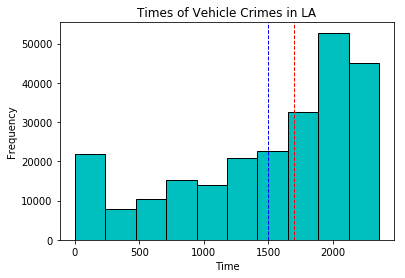

In [106]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(df_vehicle_crime['Time Occurred'], bins=10, color="c",edgecolor='black')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Times of Vehicle Crimes in LA")
plt.axvline(df_vehicle_crime['Time Occurred'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_vehicle_crime['Time Occurred'].median(), color='r', linestyle='dashed', linewidth=1)
